# Domanda 6

Discutere l’approssimazione a $m$ dati equispaziati ottenuti campionando la funzione $f(x)=\frac{1}{1+25x^2}$ nell’intervallo $[−1, 1]$ usando polinomi di grado $n\in\{1, 2, 3, 5, 7\}$.

Si risolva il problema dei minimi quadrati sia mediante le equazioni normali che con SVD, calcolando l’errore di approssimazione in norma 2 per entrambi i metodi. 

Infine graficare le approssimazioni polinomiali ottenute.

Soluzione equazioni normali =  [2.38039029e-01 5.02960599e-17] 

Errore equazioni normali =  0.7078897677650926 

Soluzione SVD =  [2.38039029e-01 7.12011892e-17] 

Errore svd =  0.7078897677650926 



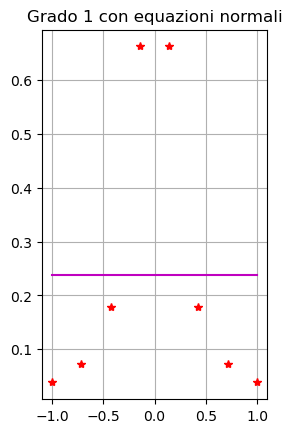

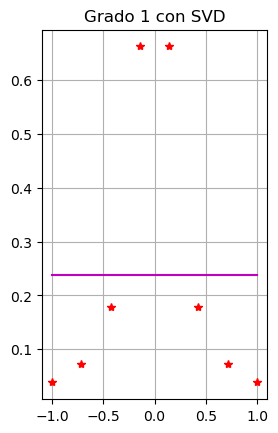

Soluzione equazioni normali =  [ 4.57125034e-01  5.97551727e-17 -5.11200681e-01] 

Errore equazioni normali =  0.45666678510626657 

Soluzione SVD =  [ 4.57125034e-01  5.35504570e-17 -5.11200681e-01] 

Errore svd =  0.45666678510626657 



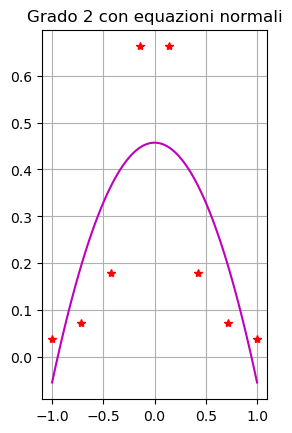

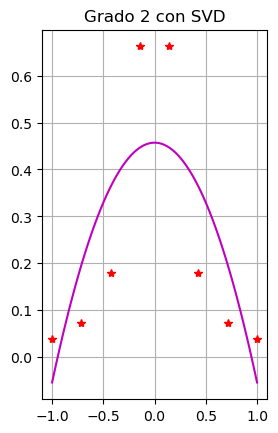

Soluzione equazioni normali =  [ 4.57125034e-01  1.24204081e-16 -5.11200681e-01 -1.24557605e-16] 

Errore equazioni normali =  0.45666678510626657 

Soluzione SVD =  [ 4.57125034e-01  1.17122822e-16 -5.11200681e-01 -6.21008779e-17] 

Errore svd =  0.45666678510626657 



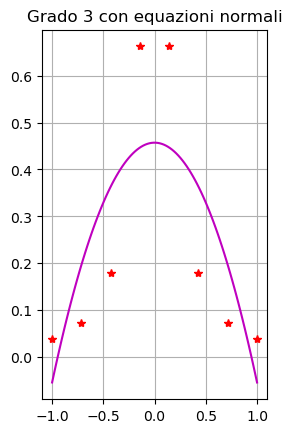

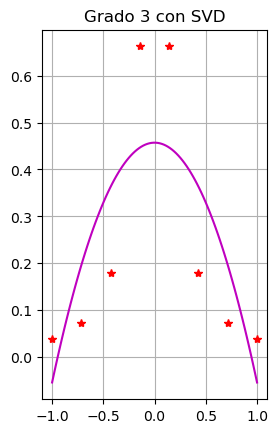

Soluzione equazioni normali =  [ 6.24014918e-01  5.95063782e-15 -1.91936919e+00 -2.31308502e-14
  1.34916704e+00  1.74036962e-14] 

Errore equazioni normali =  0.24942788352373732 

Soluzione SVD =  [ 6.24014918e-01 -1.44762103e-15 -1.91936919e+00  4.00943343e-15
  1.34916704e+00 -2.33747213e-15] 

Errore svd =  0.24942788352373735 



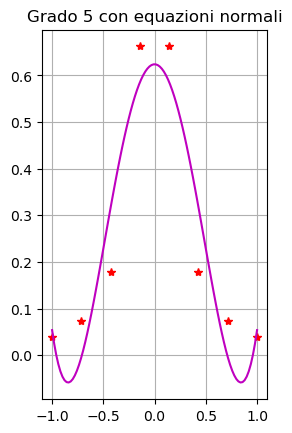

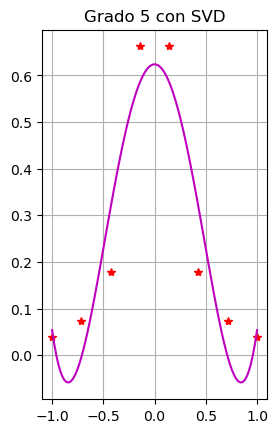

Soluzione equazioni normali =  [ 7.52641393e-01  4.18445029e-13 -4.61655145e+00 -4.00013441e-12
  9.07597030e+00  9.03156231e-12 -5.17359870e+00 -5.45014430e-12] 

Errore equazioni normali =  8.578979595368163e-14 

Soluzione SVD =  [ 7.52641393e-01  1.73817650e-14 -4.61655145e+00  4.78937137e-14
  9.07597030e+00 -5.81279978e-14 -5.17359870e+00  6.12849744e-14] 

Errore svd =  1.029037292179348e-13 



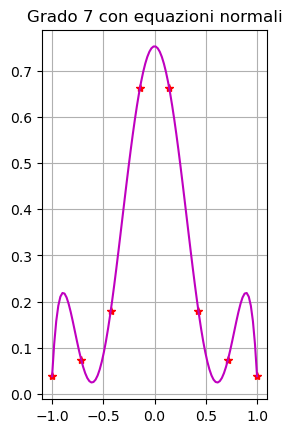

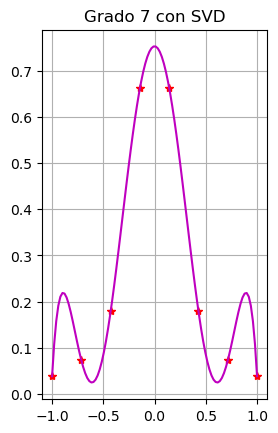

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

m = 8
x = np.linspace(-1, 1, m)
y = 1/(1+25*x**2)
degree_pol = np.array((1, 2, 3, 5, 7))

for n in degree_pol:
    A = np.zeros((m, n+1))
    for i in range(n+1):
        A[:, i] = x**i
        
    U, s , Vh = scipy.linalg.svd(A)
    x_svd = np.zeros(n+1)
    
    ATA = np.matmul(A.T, A)
    ATy = np.matmul(A.T, y)
    
    lu, piv = scipy.linalg.lu_factor(ATA)
    x_eqnorm = scipy.linalg.lu_solve((lu, piv), ATy)
    print("Soluzione equazioni normali = ", x_eqnorm, '\n')
    
    res_eqnorm = np.linalg.norm(A @ x_eqnorm - y)
    print("Errore equazioni normali = ", res_eqnorm, '\n')
    
    for i in range(n+1):
        ui = U[:, i]
        vi = Vh[i, :]
        
        x_svd = x_svd + (np.dot(ui.T, y) *vi) / s[i]
        
    print("Soluzione SVD = ", x_svd, '\n')
        
    res_svd = np.linalg.norm(A @ x_svd - y)
    print("Errore svd = ", res_svd, '\n')
        
    m_plot = 100
    x_plot = np.linspace(x[0], x[-1], m_plot)
    A_plot = np.zeros((m_plot, n+1))
        
    for i in range(n+1):
        A_plot[:, i] = x_plot ** i
            
    y_eqnorm = A_plot @ x_eqnorm
    
    
    fig1 = plt.subplot(1, 2, 1)
    plt.title(f"Grado {n} con equazioni normali")
    plt.plot(x, y, '*r')
    plt.plot(x_plot, y_eqnorm, 'm')
    plt.grid()
        
    plt.show()
        
        
    y_svd = A_plot @ x_svd
        
    fig2 = plt.subplot(1, 2, 2)
    plt.title(f"Grado {n} con SVD")
    plt.plot(x, y, '*r')
    plt.plot(x_plot, y_svd, 'm')
    plt.grid()
        
    plt.show()
